# Configuration File Parsing 

By: Jimuel Celeste, Jr. 

Objective: Convert configuration file to directed acyclic graph. 


In [1]:
import os
import yaml
from pathlib import Path


def load_yaml(yaml_path):
	"""
	Loads YAML  file
	
	Parameters:
		yaml_path (str): Path to the yaml file.

	Returns: 
		dict: Content of the input yaml file.
	"""
	with open(yaml_path, 'r') as f: 
		content = yaml.safe_load(f)
	
	return content


def generate_dag(pipeline_config):
	"""
	Generates a Directed Acyclic Graph (DAG) representation of the configuration file.
	
	Parameters:
		pipeline_config (str): Path of the configuration file. 

	"""
	nodes = {}
	edges = []
	
	for task in pipeline_config: 
		parent_node = task['dependency']
		child_node = task['unique_id']
		
		nodes[child_node] = {
			"name": task['task'],
			"unique_id": task['unique_id'],
			"parameters": task['parameters'],
			"dependency": task['dependency']
		}

		edge = (parent_node, child_node)
		edges.append(edge)

	return nodes, edges


def get_sink_nodes(edges):
	"""
	Returns the sink nodes of a DAG.

	Parameters:
		edges (list): List of edges of a DAG.
	
	Returns: 
		list: Sink nodes of a DAG.
	"""
	sink_nodes = []

	for edge in edges:
		parent_node, child_node = edge

		if parent_node in sink_nodes:
			sink_nodes.remove(parent_node)

		sink_nodes.append(child_node)

	return sink_nodes


def parse_pipeline_config(config_path):
	"""Parses a configuration manifest
	
	config_path 

	"""

	# Loads the YAML configuration manifest
	config = load_yaml(config_path)

	# Get the pipeline configuration
	pipeline_config = config['pipeline']

	# Generates DAG
	nodes, edges = generate_dag(pipeline_config)

	# Get the sinks from DAG 
	sink_nodes = get_sink_nodes(edges)

	return (nodes, edges, sink_nodes)

In [2]:
sample_config = "/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/config/TAUKADIAL2024_acoustic.yml"

In [3]:
parse_pipeline_config(sample_config)

({'converted_bit_depth': {'name': 'convert_bit_depth',
   'unique_id': 'converted_bit_depth',
   'parameters': {'target_bit_depth': 'PCM_16'},
   'dependency': 'input'},
  'denoised': {'name': 'denoise',
   'unique_id': 'denoised',
   'parameters': {'initial_noise': 6,
    'window_size': 0,
    'noise_threshold': 0.15},
   'dependency': 'converted_bit_depth'},
  'amplitude_normalized': {'name': 'normalize',
   'unique_id': 'amplitude_normalized',
   'parameters': {'target_dbfs': -20},
   'dependency': 'denoised'},
  'compare_2016_lld': {'name': 'opensmile',
   'unique_id': 'compare_2016_lld',
   'parameters': {'feature_set': 'compare_2016',
    'level': 'lld',
    'is_for_openxbow': True},
   'dependency': 'amplitude_normalized'},
  'compare_2016_functionals': {'name': 'opensmile',
   'unique_id': 'compare_2016_functionals',
   'parameters': {'feature_set': 'compare_2016', 'level': 'functionals'},
   'dependency': 'amplitude_normalized'},
  'gemaps_functionals': {'name': 'opensmile',
 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


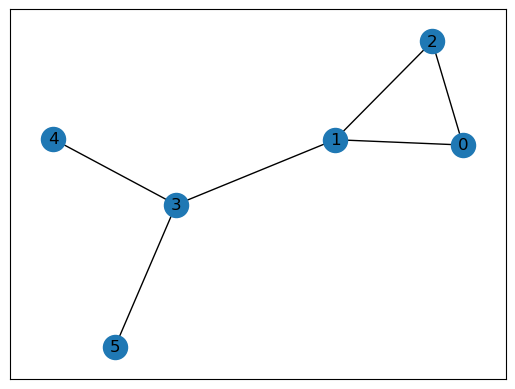

In [4]:
# https://www.geeksforgeeks.org/visualize-graphs-in-python/
# First networkx library is imported 
# along with matplotlib 
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

	def __init__(self): 
		
		# visual is a list which stores all 
		# the set of edges that constitutes a 
		# graph 
		self.visual = [] 
		
	# addEdge function inputs the vertices of an 
	# edge and appends it to the visual list 
	def addEdge(self, a, b): 
		temp = [a, b] 
		self.visual.append(temp) 
		
	# In visualize function G is an object of 
	# class Graph given by networkx G.add_edges_from(visual) 
	# creates a graph with a given list 
	# nx.draw_networkx(G) - plots the graph 
	# plt.show() - displays the graph 
	def visualize(self): 
		G = nx.Graph() 
		G.add_edges_from(self.visual) 
		nx.draw_networkx(G) 
		plt.show() 

# Driver code 
G = GraphVisualization() 
G.addEdge(0, 2) 
G.addEdge(1, 2) 
G.addEdge(1, 3) 
G.addEdge(5, 3) 
G.addEdge(3, 4) 
G.addEdge(1, 0) 
G.visualize() 


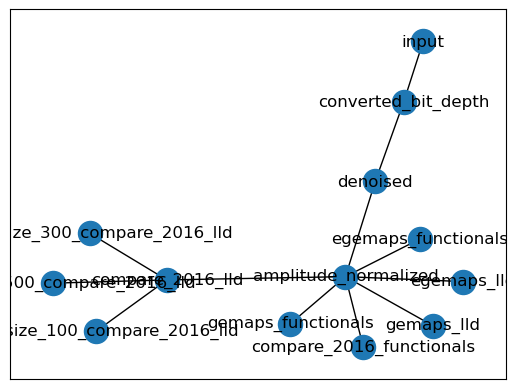

In [5]:
_, edges, _ = parse_pipeline_config(sample_config)
G = GraphVisualization()
for parent, child in edges:
    if parent:
        G.addEdge(parent, child) 
G.visualize()

In [6]:
converted_nodes = {}
converted_edges = []

i = 0
for parent, child in edges:
    if parent: 
        if parent not in converted_nodes.keys():
            converted_nodes[parent] = i
            i += 1
        
        if child not in converted_nodes.keys():
            converted_nodes[child] = i
            i += 1

        converted_edge = (converted_nodes[parent], converted_nodes[child])
        converted_edges.append(converted_edge)

converted_nodes, converted_edges

({'input': 0,
  'converted_bit_depth': 1,
  'denoised': 2,
  'amplitude_normalized': 3,
  'compare_2016_lld': 4,
  'compare_2016_functionals': 5,
  'gemaps_functionals': 6,
  'gemaps_lld': 7,
  'egemaps_functionals': 8,
  'egemaps_lld': 9,
  'boaw_size_500_compare_2016_lld': 10,
  'boaw_size_300_compare_2016_lld': 11,
  'boaw_size_100_compare_2016_lld': 12},
 [(0, 1),
  (1, 2),
  (2, 3),
  (3, 4),
  (3, 5),
  (3, 6),
  (3, 7),
  (3, 8),
  (3, 9),
  (4, 10),
  (4, 11),
  (4, 12)])

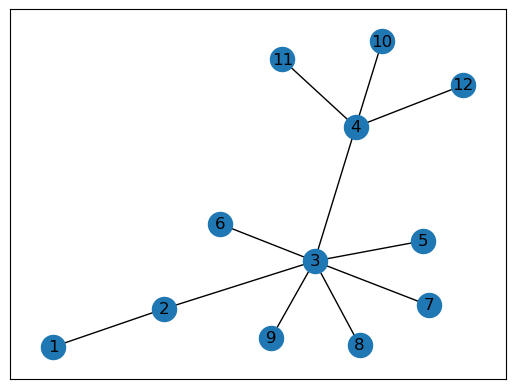

In [7]:
G = GraphVisualization()
for parent, child in converted_edges:
    if parent:
        G.addEdge(parent, child) 
G.visualize()

## Adding arrows

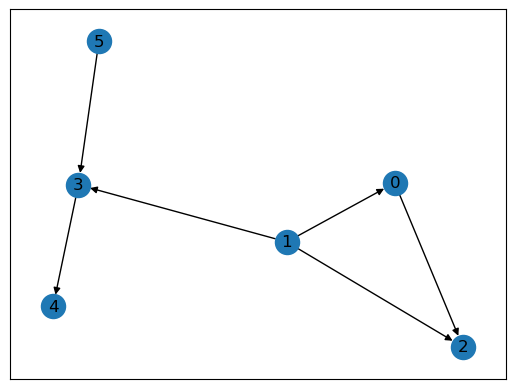

In [8]:
# https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python

class GraphVisualization: 

	def __init__(self): 
		
		# visual is a list which stores all 
		# the set of edges that constitutes a 
		# graph 
		self.visual = [] 
		
	# addEdge function inputs the vertices of an 
	# edge and appends it to the visual list 
	def addEdge(self, a, b): 
		temp = [a, b] 
		self.visual.append(temp) 
		
	# In visualize function G is an object of 
	# class Graph given by networkx G.add_edges_from(visual) 
	# creates a graph with a given list 
	# nx.draw_networkx(G) - plots the graph 
	# plt.show() - displays the graph 
	def visualize(self): 
		G = nx.DiGraph() 
		G.add_edges_from(self.visual) 
		nx.draw_networkx(G, arrows=True) 
		plt.show() 

# Driver code 
G = GraphVisualization() 
G.addEdge(0, 2) 
G.addEdge(1, 2) 
G.addEdge(1, 3) 
G.addEdge(5, 3) 
G.addEdge(3, 4) 
G.addEdge(1, 0) 
G.visualize() 


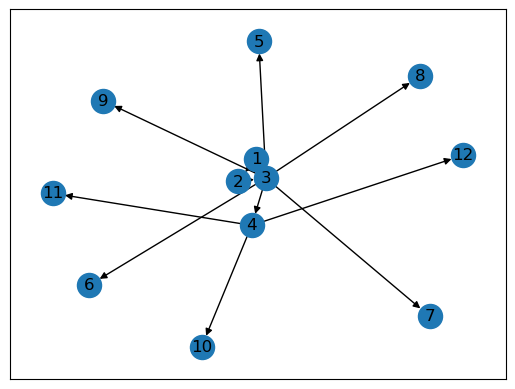

In [9]:
G = GraphVisualization()
for parent, child in converted_edges:
    if parent:
        G.addEdge(parent, child) 
G.visualize()

## Beautiful DiGraphs

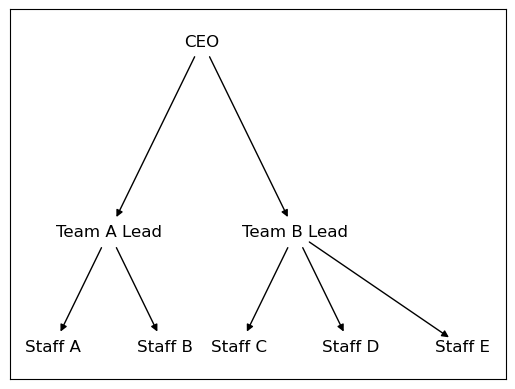

In [10]:
# https://towardsdatascience.com/graph-visualisation-basics-with-python-part-ii-directed-graph-with-networkx-5c1cd5564daa/
import numpy as np 

G = nx.DiGraph()

nodes = np.arange(0, 8).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1), (0,2), (1,3), (1, 4), (2, 5), (2, 6), (2,7)])

pos = {
    0:(10, 10),
    1:(7.5, 7.5), 
    2:(12.5, 7.5),
    3:(6, 6), 
    4:(9, 6),
    5:(11, 6), 
    6:(14, 6), 
    7:(17, 6)
}

labels = {
    0:"CEO",
    1:"Team A Lead", 
    2: "Team B Lead",
    3: "Staff A", 
    4: "Staff B",
    5: "Staff C", 
    6: "Staff D", 
    7: "Staff E"}

nx.draw_networkx(G, pos=pos, labels=labels, arrows=True, node_shape="s", node_color="white")
# plt.title("Organogram of a company.")
# plt.savefig("Output/plain organogram using networkx.jpeg", dpi=300)
plt.show()

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/2521732327.py:8: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(T, prog="twopi")


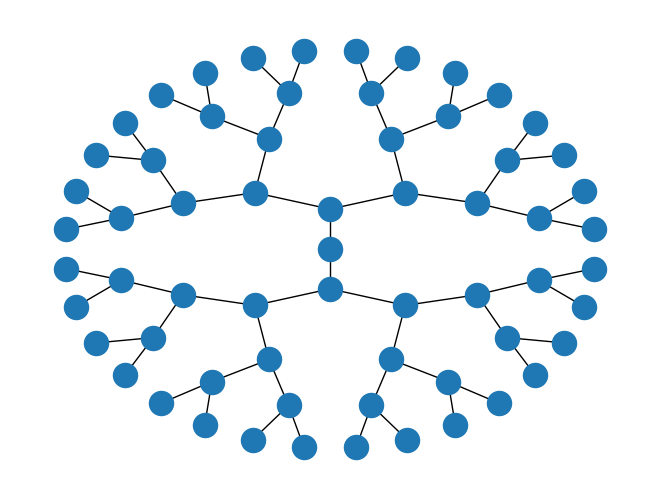

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 5)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos)
plt.show()

## Applying Beautiful Layout

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/1361569698.py:25: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="twopi")


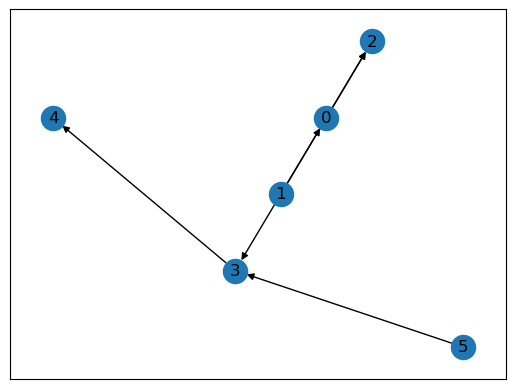

In [12]:
# https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python
class GraphVisualization: 

	def __init__(self): 
		
		# visual is a list which stores all 
		# the set of edges that constitutes a 
		# graph 
		self.visual = [] 
		
	# addEdge function inputs the vertices of an 
	# edge and appends it to the visual list 
	def addEdge(self, a, b): 
		temp = [a, b] 
		self.visual.append(temp) 
		
	# In visualize function G is an object of 
	# class Graph given by networkx G.add_edges_from(visual) 
	# creates a graph with a given list 
	# nx.draw_networkx(G) - plots the graph 
	# plt.show() - displays the graph 
	def visualize(self): 
		G = nx.DiGraph() 
		G.add_edges_from(self.visual) 
		pos = graphviz_layout(G, prog="twopi")
		nx.draw_networkx(G, pos=pos, arrows=True) 
		plt.show() 

# Driver code 
G = GraphVisualization() 
G.addEdge(0, 2) 
G.addEdge(1, 2) 
G.addEdge(1, 3) 
G.addEdge(5, 3) 
G.addEdge(3, 4) 
G.addEdge(1, 0) 
G.visualize() 

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/1361569698.py:25: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="twopi")


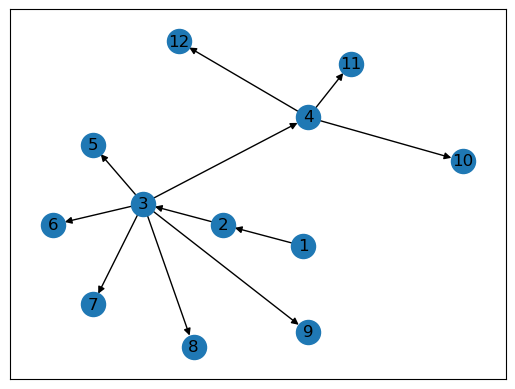

In [13]:
G = GraphVisualization()
for parent, child in converted_edges:
    if parent:
        G.addEdge(parent, child) 
G.visualize()

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/2247083572.py:25: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


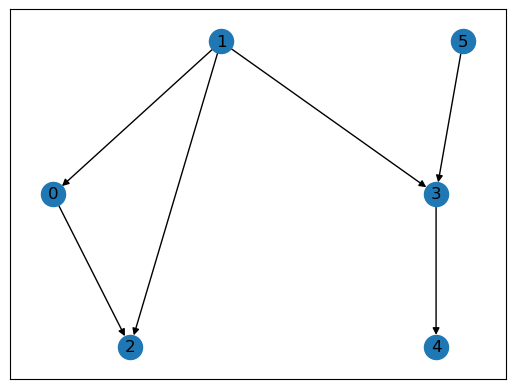

In [14]:
# https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python
class GraphVisualization: 

	def __init__(self): 
		
		# visual is a list which stores all 
		# the set of edges that constitutes a 
		# graph 
		self.visual = [] 
		
	# addEdge function inputs the vertices of an 
	# edge and appends it to the visual list 
	def addEdge(self, a, b): 
		temp = [a, b] 
		self.visual.append(temp) 
		
	# In visualize function G is an object of 
	# class Graph given by networkx G.add_edges_from(visual) 
	# creates a graph with a given list 
	# nx.draw_networkx(G) - plots the graph 
	# plt.show() - displays the graph 
	def visualize(self): 
		G = nx.DiGraph() 
		G.add_edges_from(self.visual) 
		pos = graphviz_layout(G, prog="dot")
		nx.draw_networkx(G, pos=pos, arrows=True) 
		plt.show() 

# Driver code 
G = GraphVisualization() 
G.addEdge(0, 2) 
G.addEdge(1, 2) 
G.addEdge(1, 3) 
G.addEdge(5, 3) 
G.addEdge(3, 4) 
G.addEdge(1, 0) 
G.visualize() 

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/2247083572.py:25: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


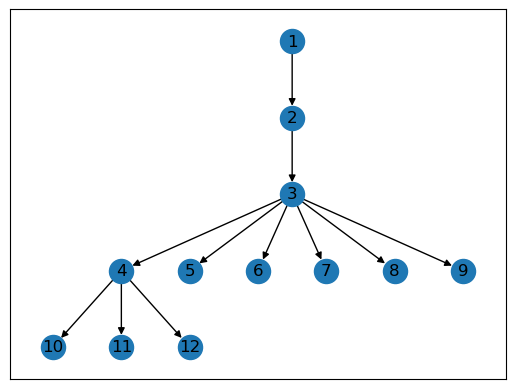

In [15]:
G = GraphVisualization()
for parent, child in converted_edges:
    if parent:
        G.addEdge(parent, child) 
G.visualize()

## Additional parsing tool

In [16]:
def visualize_dag(edges, output_file):
	G = nx.DiGraph() 
	G.add_edges_from(edges) 
	pos = graphviz_layout(G, prog="dot")
	nx.draw_networkx(G, pos=pos, arrows=True) 	
	plt.savefig(output_file, dpi=300)

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/3606634341.py:4: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


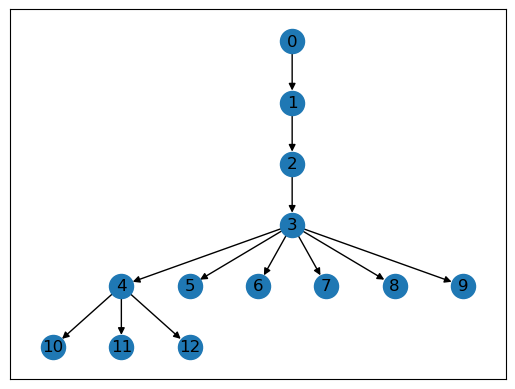

In [17]:
output_file = "../results/sandbox/TAUKADIAL2024_DAG.jpeg"
visualize_dag(converted_edges, output_file)

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/3606634341.py:4: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


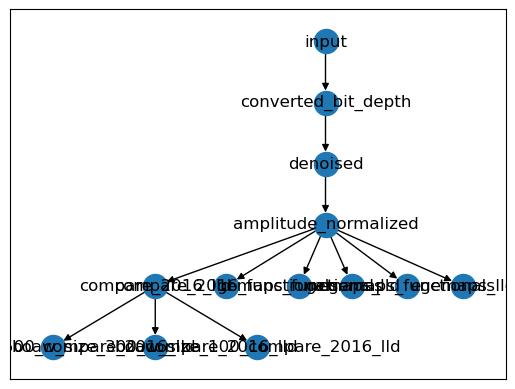

In [18]:
output_file = "../results/sandbox/TAUKADIAL2024_DAG.jpeg"
visualize_dag(edges, output_file)

In [20]:
def convert_edges_to_numbers(edges):
    converted_nodes = {}
    converted_edges = []

    i = 1
    for parent, child in edges:
        if parent not in converted_nodes.keys():
            converted_nodes[parent] = i
            i += 1
            
        if child not in converted_nodes.keys():
            converted_nodes[child] = i
            i += 1

        converted_edge = (converted_nodes[parent], converted_nodes[child])
        converted_edges.append(converted_edge)
        
    return converted_edges, converted_nodes

convert_edges_to_numbers(edges)

([(1, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (4, 6),
  (4, 7),
  (4, 8),
  (4, 9),
  (4, 10),
  (5, 11),
  (5, 12),
  (5, 13)],
 {'input': 1,
  'converted_bit_depth': 2,
  'denoised': 3,
  'amplitude_normalized': 4,
  'compare_2016_lld': 5,
  'compare_2016_functionals': 6,
  'gemaps_functionals': 7,
  'gemaps_lld': 8,
  'egemaps_functionals': 9,
  'egemaps_lld': 10,
  'boaw_size_500_compare_2016_lld': 11,
  'boaw_size_300_compare_2016_lld': 12,
  'boaw_size_100_compare_2016_lld': 13})

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_77442/3606634341.py:4: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


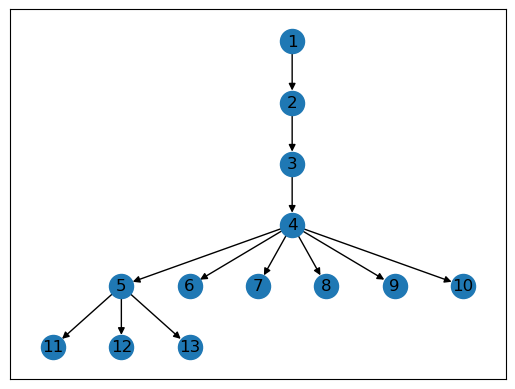

In [21]:
converted_edges, converted_nodes = convert_edges_to_numbers(edges)
visualize_dag(converted_edges, output_file)

In [23]:
print(converted_nodes)

{'input': 1, 'converted_bit_depth': 2, 'denoised': 3, 'amplitude_normalized': 4, 'compare_2016_lld': 5, 'compare_2016_functionals': 6, 'gemaps_functionals': 7, 'gemaps_lld': 8, 'egemaps_functionals': 9, 'egemaps_lld': 10, 'boaw_size_500_compare_2016_lld': 11, 'boaw_size_300_compare_2016_lld': 12, 'boaw_size_100_compare_2016_lld': 13}
